In [47]:
import pandas as pd
import numpy as np
import math
import sys
import scipy.io
from matplotlib import pyplot as plt
from scipy import signal  

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dados:

In [15]:
#leitura dos dados

amostras_data=['amostra_limpa.csv','amostra_limpa2.csv','amostra_limpa3.csv','amostra_pos_corrida.csv','amostra_pos_corrida1.csv','amostra_pos_corrida2.csv']
amostra_60='amostra_60hz.csv'

df_60=pd.read_csv('/content/drive/MyDrive/cardio_data/'+amostra_60)

df_amostras=[]
for i in amostras_data:
  df_amostras.append(pd.read_csv('/content/drive/MyDrive/cardio_data/'+i))

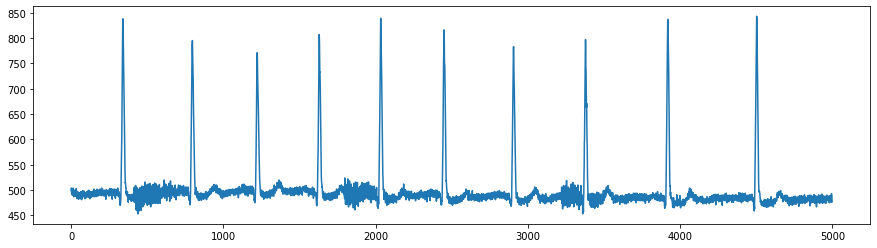

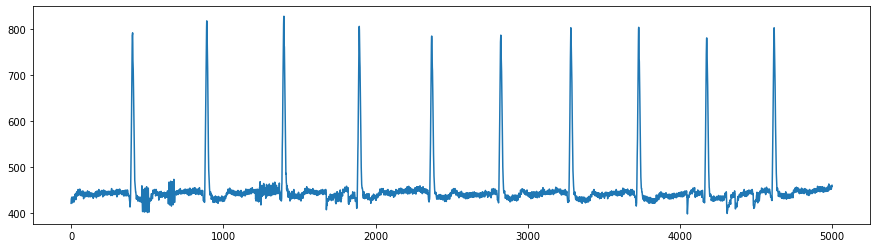

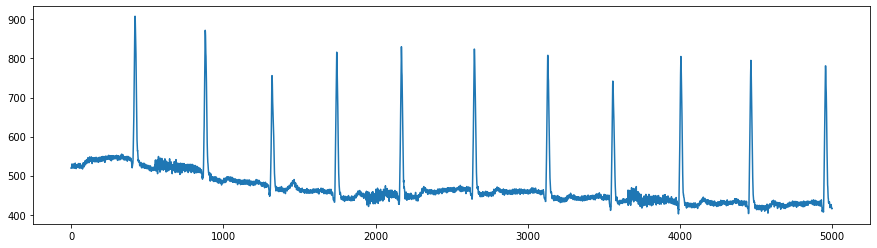

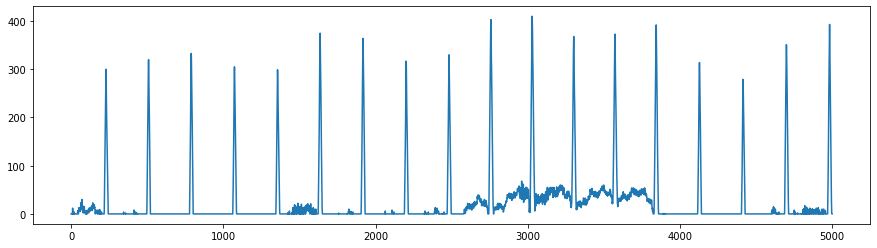

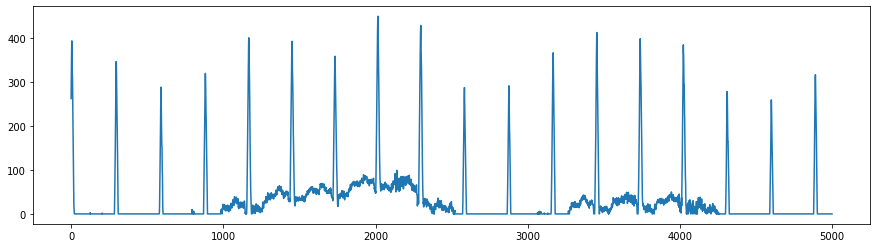

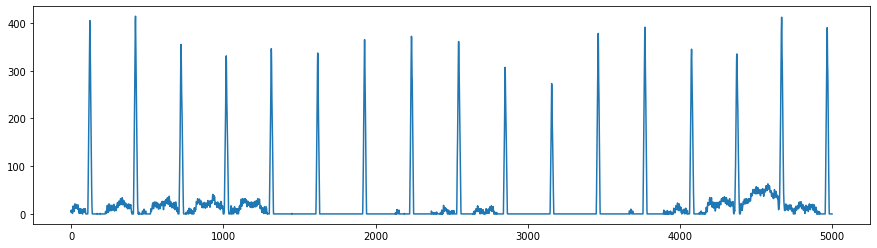

In [55]:
#print dos dados

for i in range(len(amostras_data)):
  plt.figure(figsize=(15, 4))
  #plt.plot(time1, janelas[i])
  plt.plot(list(df_amostras[i]['temp_ms'])[0:5000],list(df_amostras[i]['voltage'])[0:5000])

## Janelamento:

In [27]:
#Vamos utilizar janelas para melhorar o trabalho com os dados

def gera_janelas(tam_janela, data):

  tamanho=len(data)

  num_janelas=math.floor(tamanho/tam_janela) #arredonda pra baixo
  
  janelas=[]
  b=tam_janela 
  a=0
  for i in range(num_janelas):
    if i==0:
      janelas.append(data[a:b]) 

    else:
      janelas.append(data[a:b]) 

    a=b
    b+=tam_janela
  return janelas

In [39]:
# Função que apresenta o plot das janelas fornecidas
def printa_janelas(janelas):
  for i in range(len(janelas)):
    time1 = np. arange(len(janelas[i]))
    plt.figure(figsize=(15, 4))
    plt.plot(time1, janelas[i])

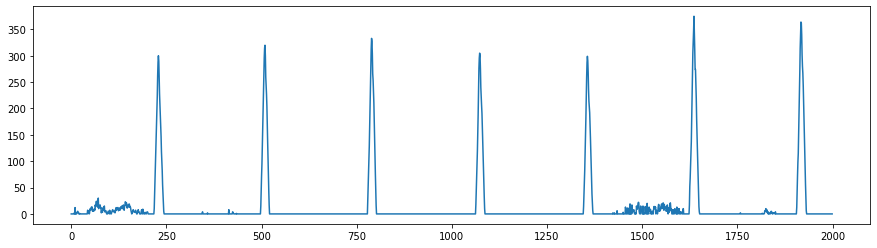

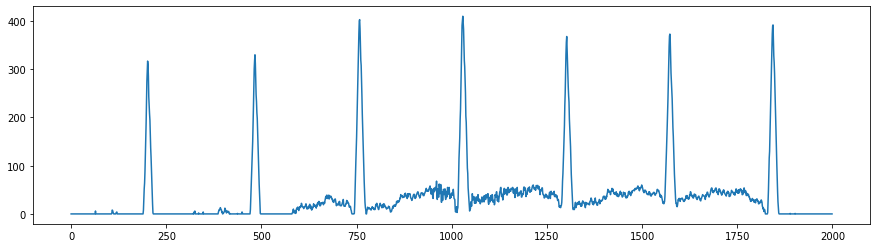

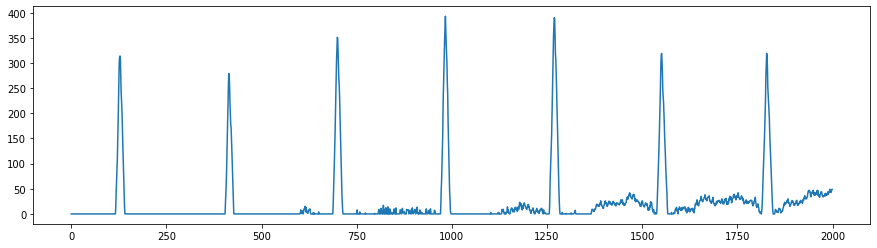

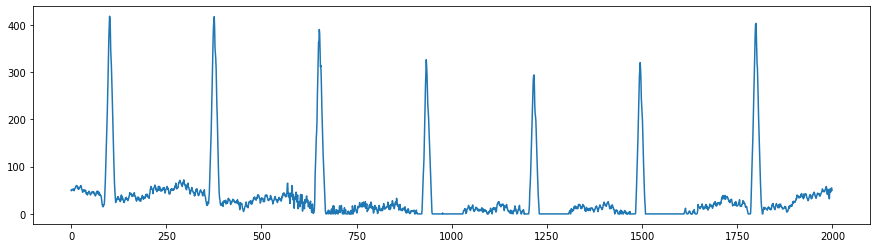

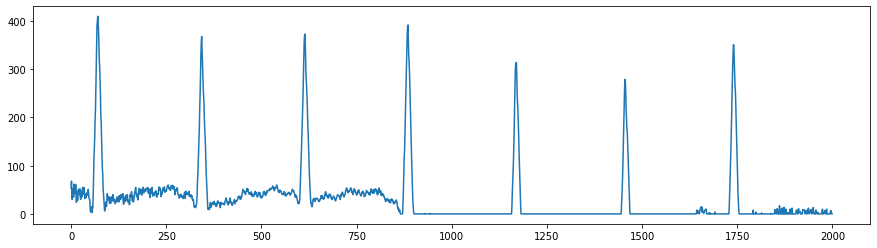

In [68]:
tam_janela=2000 #esse valor varia de acordo com a frequencia usada
janelas=gera_janelas(tam_janela,list(df_amostras[3]['voltage']))
printa_janelas(janelas)

## Filtragem:

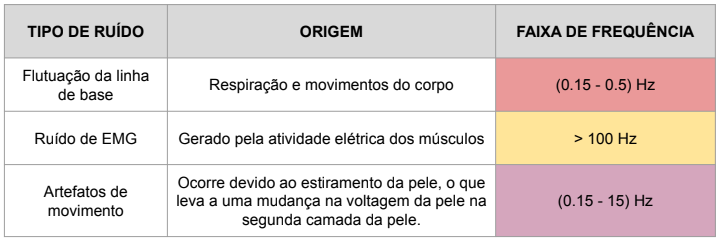

In [69]:
# https://acervolima.com/filtro-digital-high-pass-butterworth-em-python/
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4624499/

#constantes
fs=300
nyq=.5*fs

# Filtro Butterworth passa faixa de ordem n

def filtro_butter(fc,ordem):
  low=fc[0]/nyq
  high=fc[1]/nyq
  coefs=signal.butter(ordem, [low,high], 'band')
  return coefs

In [70]:

def filtro_janelas(fc,ordem,janelas):

  filtrado=[]
  for n in range(len(janelas)):
    aux=filtro_butter(fc,ordem)  #([0.5,100],7)
    filtrado.append(signal.filtfilt(aux[0],aux[1],janelas[n]))
  
  return filtrado

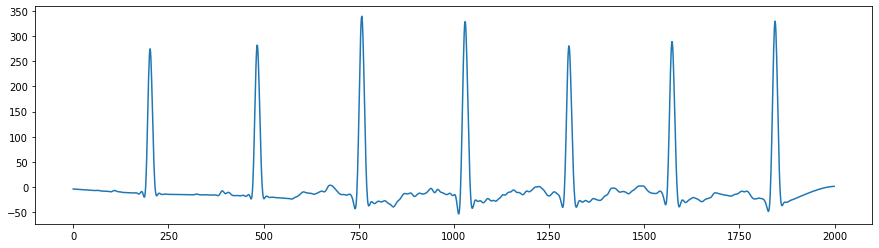

In [80]:
filtrado=filtro_janelas([0.5,20],5,janelas)

#aux=filtro_butter([0.5,100],7)
#filtrado= signal.filtfilt(aux[0],aux[1],janelas[7])
#tentar plotar sinal depois do filtro

time1 = np. arange(len(filtrado[0]))
plt.figure(figsize=(15, 4))
#plt.plot(time1, janelas[1])
plt.plot(time1, filtrado[1])#,color='red')

## Atributos:

Criando valor dos records:

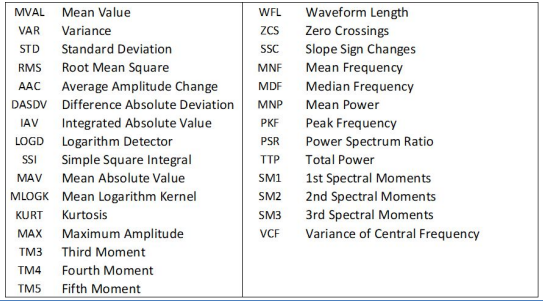

In [62]:
#Função de atributod

from scipy import signal
from scipy.stats import kurtosis
import numpy as np


def atributos(k):
    # k is the dataset
  
  [lin, col] = k.shape

  AAC = []
  DASDV = []
  IAV = []
  LOGD = []
  MAV = []
  MLOGK = []
  RMS = []
  KURT = []
  SSC = []
  SSI = []
  VAR = []
  WFL = []
  ZCS = []
  TM3= []
  TM4 = []
  TM5 = []
  STD = []
  MVAL = []
  MAX = []
  PSR = []
  PKF = []
  MNP = []
  MDF = []
  MNF = []
  TTP = []
  VCF = []
  SM1 = []
  SM2 = []
  SM3 = []



      # colocar o loop (o = 1:col)
  for o in range(0,col):

    F, P = scipy.signal.periodogram(k.iloc[:,o])

    AAC.append((1/lin)*(np.sum(np.abs(np.diff(k.iloc[o,:])))))
    DASDV.append(np.sqrt((1/(lin-1))*np.sum(np.diff(k.iloc[o,:])**2)))
    IAV.append(np.sum(k.iloc[o,:]))
    LOGD.append(np.exp((1/lin)*(np.sum(np.log10(0.0001 + (np.abs(k.iloc[o,:])))))))
    MAV.append((1/lin)*(np.sum(np.abs(k.iloc[o,:]))))
    MLOGK.append((1/lin)*(np.abs(np.sum(k.iloc[o,:]))))
    RMS.append(np.sqrt((1/lin)*(np.sum(k.iloc[o,:]**2))))
    KURT.append(kurtosis(k.iloc[o,:]))
    SSC.append(len(np.nonzero(np.diff(np.sign(np.diff(k.iloc[o,:]))))))
    SSI.append(np.sum(k.iloc[o,:]**2))
    VAR.append(np.var(k.iloc[o,:]))
    WFL.append(0)
    ZCS.append(len(np.nonzero(np.diff(np.sign(k.iloc[o,:])))))
    TM3.append(np.abs((1/lin)*(np.sum(k.iloc[o,:]**3))))
    TM4.append(np.abs((1/lin)*(np.sum(k.iloc[o,:]**4))))
    TM5.append(np.abs((1/lin)*(np.sum(k.iloc[o,:]**5))))
    STD.append(np.std(k.iloc[o,:]))
    MVAL.append((1/lin)*(np.sum(k.iloc[o,:])))
    MAX.append(np.amax(k.iloc[o,:]))
    PSR.append(((np.amax(P)/(np.sum(P)))))
    MNF.append(np.sum(F*P)/np.sum(P))
    MNP.append(np.sum(P)/len(F))
    PKF.append(np.amax(P))
    TTP.append(np.sum(P))
    SM1.append(np.sum(F*P))
    SM2.append(np.sum((F**2)*P))
    SM3.append(np.sum((F**3)*P))
    VCF.append((((SM2[o]/TTP[o]) - ((SM1[o])/TTP[o]))**2))
    MDF.append((1/2)*(np.sum(P)))


  colunas= ['AAC', 'DASDV', 'IAV', 'LOGD', 'MAV', 'MLOGK', 'RMS', 'KURT', 'SSC', 'SSI', 
            'VAR', 'WFL', 'ZCS', 'TM3', 'TM4', 'TM5', 'STD', 'MVAL', 'MAX', 'PSR', 'MNF', 'MNP', 'PKF', 'TTP', 'SM1', 'SM2', 'SM3', 'VCF', 'MDF']

  #podemos criar um dataframe a partir do dicionario das variaveis e dos valores coletados
  #podemos criar um dicionario a partir da junção das listas utilizando zip()
  #a funçao zip basicamente empilha os vetores e eles se comportam como uma "linha" de matriz 
  #estamos empilhando as colunas com um vetor de vetores

  dataf=pd.DataFrame(data=dict(zip(colunas,[AAC, DASDV, IAV, LOGD, MAV, MLOGK, RMS, KURT, SSC, SSI, 
                                               VAR, WFL, ZCS, TM3, TM4, TM5, STD, MVAL, MAX, PSR, MNF, MNP, PKF, TTP, SM1, SM2, SM3, VCF, MDF])))
  
  #allFeatures = np.hstack((AAC, DASDV, IAV, LOGD, MAV, MLOGK, RMS, KURT, SSC, SSI, VAR, WFL, ZCS, TM3, TM4, TM5, STD, MVAL, MAX, PSR, MNF, MNP, PKF, TTP, SM1, SM2, SM3, VCF, MDF))
  
  #dessa forma retornaremos um dataframe com os atributos de cada janela separado por linha
  return dataf

In [60]:
df=pd.DataFrame(filtrado).T
df_atributos=atributos(df)

In [61]:
df_atributos

,AAC,DASDV,IAV,LOGD,MAV,MLOGK,RMS,KURT,SSC,SSI,...,PSR,MNF,MNP,PKF,TTP,SM1,SM2,SM3,VCF,MDF
0,0.130226,4.064887,122.249883,1.002268,0.072935,0.061125,2.898957,0.228319,1,16807.905454,...,0.073375,0.017065,3715.424170,272890.378838,3.719140e+06,63467.697807,1771.381535,80.021469,0.000275,1.859570e+06
1,0.145282,4.420913,136.238619,1.002055,0.077359,0.068119,3.080957,0.213245,1,18984.589161,...,0.066251,0.014016,6920.690681,458964.055383,6.927611e+06,97098.355299,3026.914225,292.323851,0.000184,3.463806e+06
2,0.159815,4.709480,142.835562,1.002620,0.085525,0.071418,3.220784,0.175474,1,20746.898491,...,0.059297,0.017459,3212.601480,190688.570916,3.215814e+06,56144.804791,1577.767916,70.857696,0.000288,1.607907e+06
3,0.167487,4.872310,140.477337,1.002412,0.086772,0.070239,3.285189,0.164241,1,21584.932593,...,0.102024,0.014428,5758.646416,588109.218226,5.764405e+06,83170.756512,2270.455691,132.196682,0.000197,2.882203e+06
4,0.167554,4.907876,133.568894,1.001407,0.084023,0.066784,3.286275,0.183213,1,21599.209403,...,0.070631,0.017378,3536.363761,250028.016814,3.539900e+06,61514.644824,1692.619794,73.132051,0.000286,1.769950e+06


## Classificação: